## Tensorflow Ploting

Import Dependency

In [62]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


Load data

In [33]:
with np.load('C:\\vs2015shareddata\\dataset\\mnist.npz') as f:
	(x_train, y_train) = f['x_train'][:20000],f['y_train'][:20000]
	(x_test, y_test) = f['x_test'],f['y_test']
	
x_train, x_test = x_train / 255.0, x_test / 255.0

In [34]:
x_train.shape

(20000, 28, 28)

Build Model

In [93]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',#tf.keras.optimizers.SGD(0.01,0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

Callbacks

In [61]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

Train Data

In [94]:
history = model.fit(x_train, y_train, epochs=10, batch_size=100, callbacks=callbacks, validation_data=(x_test,y_test))

Train on 20000 samples, validate on 10000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 196us/sample - loss: 0.4271 - acc: 0.8781 - val_loss: 0.2398 - val_acc: 0.9319
Epoch 2/10
20000/20000 [==============================] - 3s 160us/sample - loss: 0.1894 - acc: 0.9457 - val_loss: 0.1589 - val_acc: 0.9535
Epoch 3/10
20000/20000 [==============================] - 3s 166us/sample - loss: 0.1298 - acc: 0.9628 - val_loss: 0.1321 - val_acc: 0.9614
Epoch 4/10
20000/20000 [==============================] - 3s 162us/sample - loss: 0.0983 - acc: 0.9718 - val_loss: 0.1162 - val_acc: 0.9653
Epoch 5/10
20000/20000 [==============================] - 3s 161us/sample - loss: 0.0763 - acc: 0.9783 - val_loss: 0.1104 - val_acc: 0.9655
Epoch 6/10
20000/20000 [==============================] - 3s 160us/sample - loss: 0.0584 - acc: 0.9830 - val_loss: 0.1065 - val_acc: 0.9660
Epoch 7/10
20000/20000 [==============================] - 3s 160us/sample - loss: 0.0466 - acc: 0.9877 - val_l

Min loss & val_loss  0.0244 0.0916
Max acc  & val_acc   0.8781 0.0916


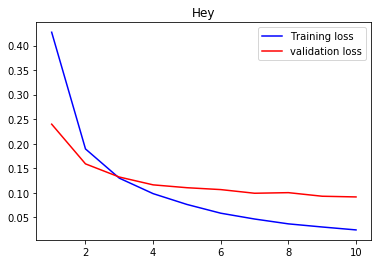

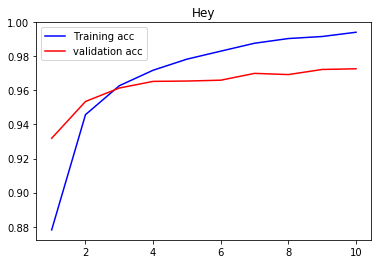

<Figure size 432x288 with 0 Axes>

In [98]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color='b', label="Training loss")
plt.plot(epochs, val_loss, color='r', label="validation loss")
plt.title('Hey')
plt.legend()
plt.figure()

plt.plot(epochs, acc, color='b', label="Training acc")
plt.plot(epochs, val_acc, color='r', label="validation acc")
plt.title('Hey')
plt.legend()
plt.figure()

print('Min loss & val_loss ',"%.4f" % min(loss), "%.4f" % min(val_loss))
print('Min loss & val_loss ',"%.4f" % min(loss), "%.4f" % min(val_loss))
print('Max acc  & val_acc  ',"%.4f" % min(acc) , "%.4f" % min(val_loss))
print('Max acc  & val_acc  ',"%.4f" % min(acc) , "%.4f" % min(val_loss))

In [69]:
result = model.evaluate(x_test, y_test)

print("loss: ", result[0],  " acc: ", result[1])

10000/10000 [==============================] - 1s 94us/sample - loss: 0.1294 - acc: 0.9760
loss:  0.12942590176832072  acc:  0.976
